The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Daria Chemkaeva put together the data set and made it available on <a href="https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020">Kaggle</a>  — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [156]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [157]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [158]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [159]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.3847     1
1.1860     1
1.1869     1
1.4966     1
1.3130     1
Name: US_dollar, Length: 3528, dtype: int64

In [161]:
euro_to_dollar = euro_to_dollar[~(euro_to_dollar['US_dollar']=='-')].reset_index(drop=True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

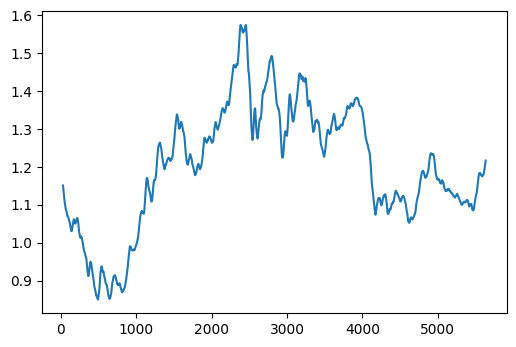

In [165]:
%matplotlib inline
euro_to_dollar.rolling_mean.dropna().plot()

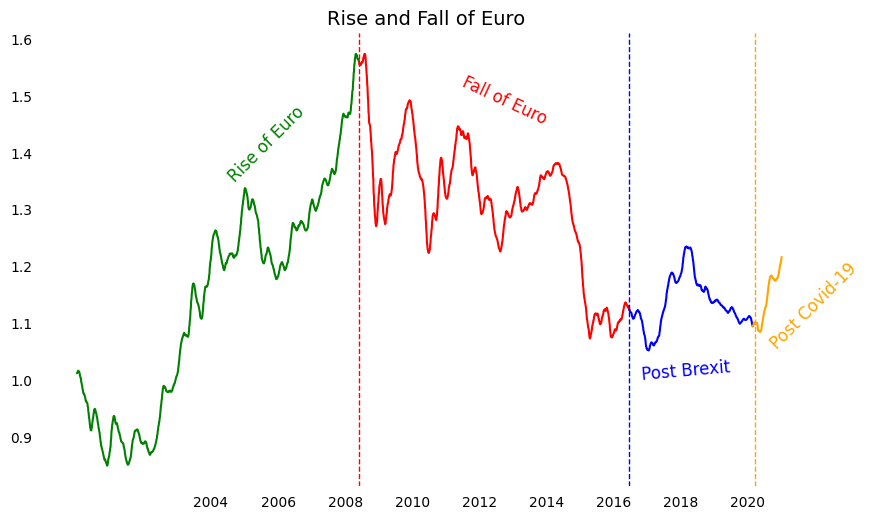

In [174]:

import numpy as np
import matplotlib.pyplot as plt
start_date = '2000-01-01'
end_date = '2008-06-01'

x1 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].Time
y1 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].rolling_mean

start_date = '2008-06-01'
end_date = '2016-06-24'

x2 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].Time
y2 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].rolling_mean

start_date = '2016-06-24'
end_date = '2020-03-01'

x3 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].Time
y3 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].rolling_mean

start_date = '2020-03-01'
end_date = euro_to_dollar.Time.iloc[-1].date().strftime("%Y-%m-%d")

x4 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].Time
y4 = euro_to_dollar[(euro_to_dollar['Time']>=start_date) & (euro_to_dollar['Time']<=end_date)].rolling_mean

# conv = np.vectorize(mdates.strpdate2num('%Y-%m-%d'))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x1,y1,color='g')
ax.plot(x2,y2,color='r')
ax.plot(x3,y3,color='b')
ax.plot(x4,y4,color='orange')
ind = pd.to_datetime(pd.Series(list(range(2004,2021,2))),format=('%Y'))
ind_tick_labels = [x.strftime('%Y') for x in ind]
ax.set_xticks(ind)
ax.set_xticklabels(ind_tick_labels)
ax.tick_params(top=False, left=False,bottom=False)
ax.axvline(pd.to_datetime('2008-06-01'), color='r', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2016-06-24'), color='b', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2020-03-21'), color='orange', linestyle='--', lw=1)
ax.text(x=pd.to_datetime('2004-06-01'),y=1.35,s='Rise of Euro',size=12,color='g',rotation=45)
ax.text(x=pd.to_datetime('2011-06-01'),y=1.45,s='Fall of Euro',size=12,color='r',rotation=-25)
ax.text(x=pd.to_datetime('2016-10-30'),y=1,s='Post Brexit',size=12,color='b',rotation=5)
ax.text(x=pd.to_datetime('2020-07-30'),y=1.055,s='Post Covid-19',size=12,color='orange',rotation=45)
ax.set_title('Rise and Fall of Euro ',size=14)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
plt.show()